<a href="https://colab.research.google.com/github/jcmachicao/deep_learning_2025_curso/blob/main/S02__RNN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [3]:
# Generate a time series dataset
def generate_time_series(n_samples=1000, freq=0.01, noise_level=0.2):
    time = np.linspace(0, n_samples * freq * 100, n_samples)
    series = np.sin(time) + np.random.randn(n_samples) * noise_level
    return series, time

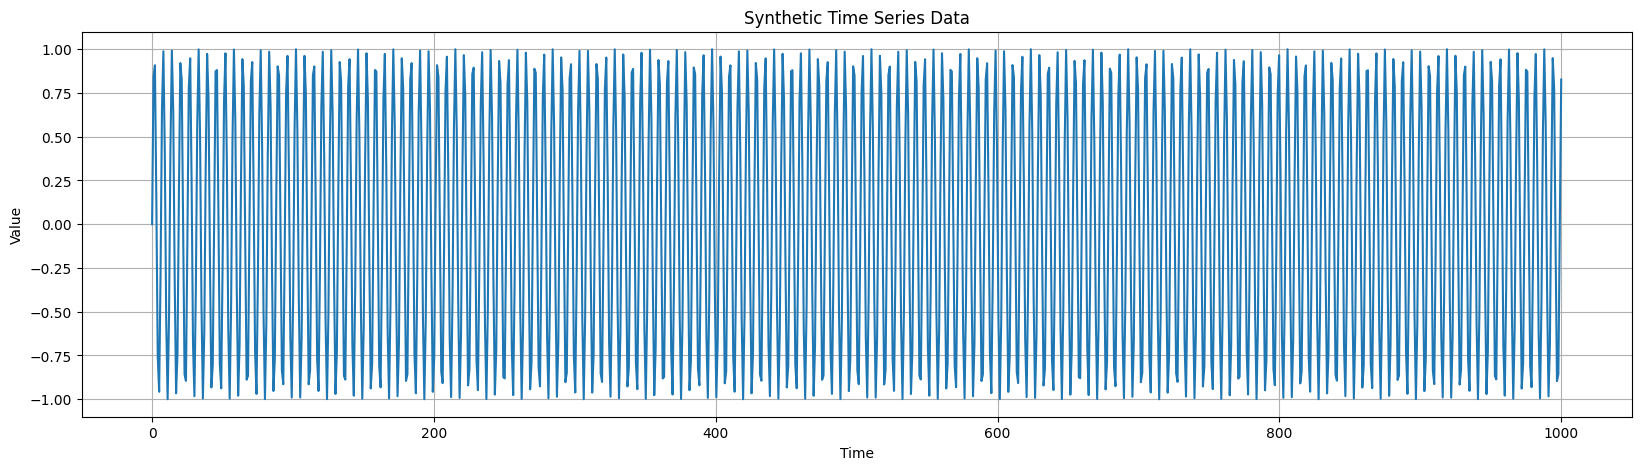

First 10 data points:
[ 0.          0.84201141  0.90846248  0.13814643 -0.75941361 -0.95749254
 -0.2736437   0.66225303  0.98816137  0.40389349]


In [5]:
series, time = generate_time_series(noise_level=0.0)

# Plot the generated series
plt.figure(figsize=(20, 5))
plt.plot(time, series)
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Display the first few data points
print("First 10 data points:")
print(series[:10])

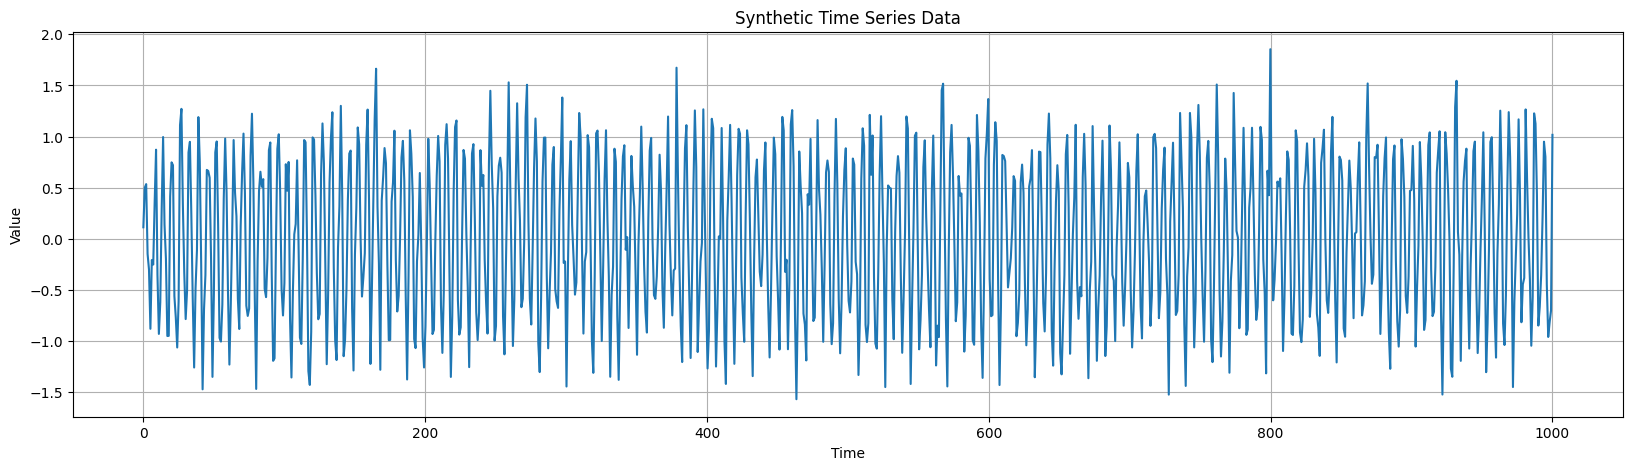

First 10 data points:
[ 0.11216714  0.49873403  0.53453879 -0.14885166 -0.30168749 -0.8809522
 -0.20846763 -0.25231433  0.34877603  0.87126015]


In [8]:
series, time = generate_time_series(noise_level=0.3)

# Plot the generated series
plt.figure(figsize=(20, 5))
plt.plot(time, series)
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Display the first few data points
print("First 10 data points:")
print(series[:10])

# Task
Generate a sample time series dataset, train a Linear Neural Network and a Recurrent Neural Network on it, and compare their performance in capturing the time series patterns.

## Prepare data for modeling

### Subtask:
Reshape the time series data into input and output sequences suitable for training both the Linear NN and the RNN.


**Reasoning**:
Define the function to reshape the time series data, apply it, reshape the input for NN models, and split the data into training and testing sets as required by the subtask.



In [9]:
from sklearn.model_selection import train_test_split

def reshape_time_series_data(series, lookback):
    X, y = [], []
    for i in range(len(series) - lookback):
        X.append(series[i:(i + lookback)])
        y.append(series[i + lookback])
    return np.array(X), np.array(y)

lookback = 20
X, y = reshape_time_series_data(series, lookback)

# Reshape X for NN models (n_samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X: (980, 20, 1)
Shape of y: (980,)
Shape of X_train: (784, 20, 1)
Shape of X_test: (196, 20, 1)
Shape of y_train: (784,)
Shape of y_test: (196,)


## Build and train linear nn

### Subtask:
Define, compile, and train a simple Linear Neural Network model on the prepared data.


**Reasoning**:
Define, compile, and train a simple Linear Neural Network model on the prepared data.



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [12]:
# Define the Linear NN model
linear_model = Sequential()
linear_model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2]))) # Flatten the input sequences
linear_model.add(Dense(64, activation='relu')) # Add a hidden layer
linear_model.add(Dense(32, activation='relu')) # Add another hidden layer
linear_model.add(Dense(1)) # Output layer

# Compile the model
linear_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history_linear = linear_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.5103 - mae: 0.6039 - val_loss: 0.1193 - val_mae: 0.2720
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1213 - mae: 0.2711 - val_loss: 0.1061 - val_mae: 0.2508
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1038 - mae: 0.2529 - val_loss: 0.1045 - val_mae: 0.2492
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0991 - mae: 0.2453 - val_loss: 0.1015 - val_mae: 0.2470
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0978 - mae: 0.2475 - val_loss: 0.1014 - val_mae: 0.2468
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0952 - mae: 0.2421 - val_loss: 0.0991 - val_mae: 0.2459
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0891 - mae: 0.2323 - val_loss: 0.1008 - val_mae: 0.2480
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mae: 0.2298 - val_loss: 0.0967 - val_mae: 0.2437
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0921 - mae: 0.2375 - v

In [ ]:
history_linear.history

{'loss': [0.1959933489561081,
  0.06331340968608856,
  0.05009816586971283,
  0.04683844745159149,
  0.04567017778754234,
  0.04429562762379646,
  0.04324040934443474,
  0.04199947789311409,
  0.04230993241071701,
  0.04069879651069641,
  0.040659550577402115,
  0.03940355405211449,
  0.038602184504270554,
  0.04043644666671753,
  0.03945363685488701,
  0.03766657039523125,
  0.037088241428136826,
  0.03652933984994888,
  0.03601177781820297,
  0.03791814297437668,
  0.03597206994891167,
  0.03545992821455002,
  0.03564801812171936,
  0.03470981866121292,
  0.0351819172501564,
  0.03463084623217583,
  0.034464556723833084,
  0.034756164997816086,
  0.03364149108529091,
  0.03332779183983803,
  0.03311735391616821,
  0.03330259397625923,
  0.033619847148656845,
  0.03287027031183243,
  0.032624538987874985,
  0.03286420553922653,
  0.03188354894518852,
  0.0319390669465065,
  0.0314512737095356,
  0.0314958393573761,
  0.03211524710059166,
  0.03073699399828911,
  0.03029295802116394,
 

## Build and train rnn

### Subtask:
Define, compile, and train an RNN model (e.g., using a SimpleRNN layer) on the prepared data.


**Reasoning**:
Define, compile, and train an RNN model as per the instructions.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Define the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history_rnn = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3080 - mae: 0.4250 - val_loss: 0.0566 - val_mae: 0.1832
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0561 - mae: 0.1951 - val_loss: 0.0476 - val_mae: 0.1695
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mae: 0.1653 - val_loss: 0.0460 - val_mae: 0.1681
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 - mae: 0.1718 - val_loss: 0.0482 - val_mae: 0.1684
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mae: 0.1689 - val_loss: 0.0468 - val_mae: 0.1693
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mae: 0.1614 - val_loss: 0.0500 - val_mae: 0.1710
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0416 - mae: 0.1672 - val_loss: 0.0482 - val_mae: 0.1767
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mae: 0.1632 - val_loss: 0.0521 - val_mae: 0.1824
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0447 - mae: 0.1726 

## Prepare data for modeling

### Subtask:
Reshape the time series data into input and output sequences suitable for training both the Linear NN, the Keras RNN, and the PyTorch RNN.


## Build and train pytorch rnn

### Subtask:
Define, compile, and train a PyTorch RNN model on the prepared data.


**Reasoning**:
Import necessary PyTorch modules, convert data to tensors, define the PyTorch RNN model, instantiate it, define loss and optimizer, and train the model, including validation.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the PyTorch RNN model
class PyTorchRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PyTorchRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass input through RNN
        rnn_out, _ = self.rnn(x)
        # Pass the output of the last time step through the linear layer
        output = self.fc(rnn_out[:, -1, :])
        return output

# Instantiate the model
input_size = 1
hidden_size = 64
output_size = 1
pytorch_rnn_model = PyTorchRNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_rnn_model.parameters(), lr=0.001)

# Train the model
epochs = 50
batch_size = 32
train_losses = []
val_losses = []

for epoch in range(epochs):
    pytorch_rnn_model.train()
    running_loss = 0.0
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = pytorch_rnn_model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_loss / len(X_train_tensor)
    train_losses.append(epoch_train_loss)

    # Validation
    pytorch_rnn_model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_test_tensor), batch_size):
            inputs = X_test_tensor[i:i+batch_size]
            labels = y_test_tensor[i:i+batch_size]

            outputs = pytorch_rnn_model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            running_val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(X_test_tensor)
    val_losses.append(epoch_val_loss)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}')

# Store the trained model in a variable
# pytorch_rnn_model is already stored

Epoch 1/50, Train Loss: 0.2896, Validation Loss: 0.0861
Epoch 2/50, Train Loss: 0.0491, Validation Loss: 0.0458
Epoch 3/50, Train Loss: 0.0457, Validation Loss: 0.0466
Epoch 4/50, Train Loss: 0.0470, Validation Loss: 0.0449
Epoch 5/50, Train Loss: 0.0466, Validation Loss: 0.0430
Epoch 6/50, Train Loss: 0.0462, Validation Loss: 0.0417
Epoch 7/50, Train Loss: 0.0460, Validation Loss: 0.0410
Epoch 8/50, Train Loss: 0.0461, Validation Loss: 0.0407
Epoch 9/50, Train Loss: 0.0462, Validation Loss: 0.0407
Epoch 10/50, Train Loss: 0.0463, Validation Loss: 0.0410
Epoch 11/50, Train Loss: 0.0465, Validation Loss: 0.0413
Epoch 12/50, Train Loss: 0.0466, Validation Loss: 0.0417
Epoch 13/50, Train Loss: 0.0466, Validation Loss: 0.0421
Epoch 14/50, Train Loss: 0.0466, Validation Loss: 0.0424
Epoch 15/50, Train Loss: 0.0466, Validation Loss: 0.0426
Epoch 16/50, Train Loss: 0.0466, Validation Loss: 0.0427
Epoch 17/50, Train Loss: 0.0465, Validation Loss: 0.0428
Epoch 18/50, Train Loss: 0.0464, Validat

## Evaluate and compare models

### Subtask:
Evaluate the performance of all three models on a test set and visualize their predictions to compare how well they capture the time series patterns.


**Reasoning**:
Evaluate all three models on the test set, make predictions, and then plot the results for comparison to fulfill the subtask.



In [ ]:
# Make predictions with the Linear NN model
linear_predictions = linear_model.predict(X_test)

# Make predictions with the Keras RNN model
rnn_predictions = rnn_model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


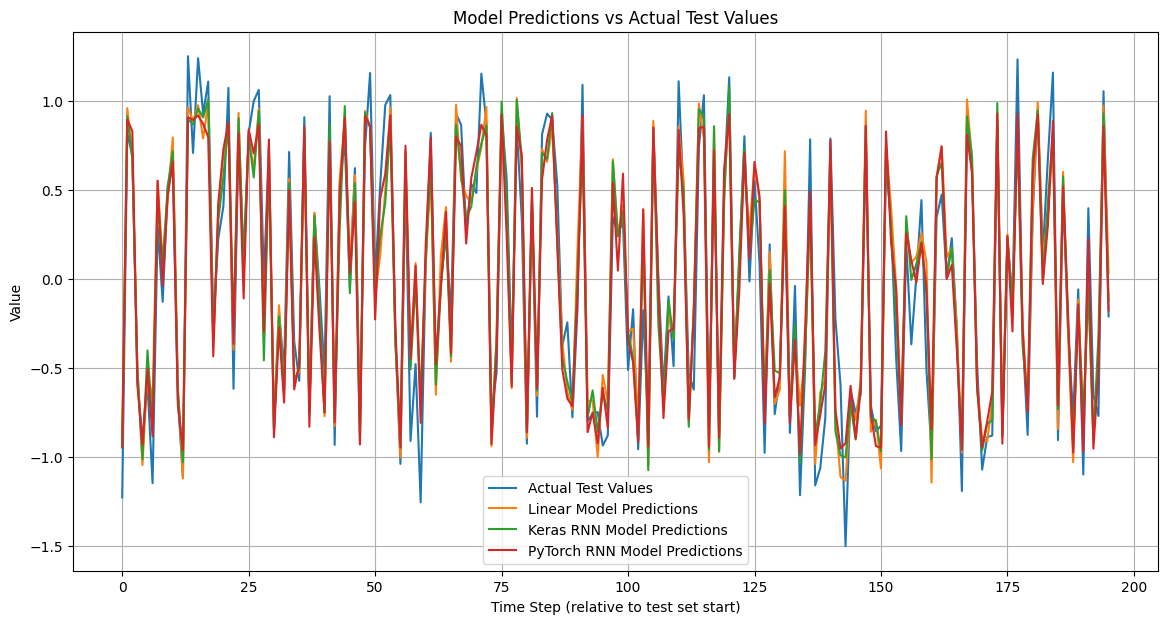

In [ ]:
import torch

# Set the PyTorch RNN model to evaluation mode
pytorch_rnn_model.eval()

# Disable gradient calculations for PyTorch predictions
with torch.no_grad():
    # Make predictions on the X_test_tensor using the pytorch_rnn_model
    pytorch_predictions_tensor = pytorch_rnn_model(X_test_tensor)

# Move PyTorch predictions to CPU and convert to NumPy array
pytorch_predictions = pytorch_predictions_tensor.cpu().numpy()


# Create a figure and axes for the plot
plt.figure(figsize=(14, 7))
ax = plt.gca() # Get current axes

# Plot the actual test values (y_test) on the axes
ax.plot(y_test, label='Actual Test Values')

# Plot the linear model's predictions (linear_predictions) on the axes
ax.plot(linear_predictions, label='Linear Model Predictions')

# Plot the Keras RNN model's predictions (rnn_predictions) on the axes
ax.plot(rnn_predictions, label='Keras RNN Model Predictions')

# Plot the PyTorch RNN model's predictions on the axes
ax.plot(pytorch_predictions, label='PyTorch RNN Model Predictions')

# Add a title to the plot
ax.set_title('Model Predictions vs Actual Test Values')

# Add labels to the x-axis and y-axis
ax.set_xlabel('Time Step (relative to test set start)')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Add a grid to the plot
ax.grid(True)

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The PyTorch RNN model was successfully defined, trained, and evaluated on the time series data.
*   The plot visually compares the predictions of the Keras Linear NN, Keras RNN, and PyTorch RNN against the actual test values, allowing for a visual assessment of their performance in capturing time series patterns.

### Insights or Next Steps

*   Based on the visual comparison, analyze which model's predictions align most closely with the actual values to determine the best-performing model for this specific time series data.
*   Quantify the performance of each model using appropriate time series evaluation metrics (e.g., Mean Squared Error, Root Mean Squared Error, Mean Absolute Error) to provide a more objective comparison alongside the visual analysis.


Linear Model Test Loss (MSE): 0.0507
Linear Model Test MAE: 0.1784
Keras RNN Model Test Loss (MSE): 0.0454
Keras RNN Model Test MAE: 0.1675
PyTorch RNN Model Test Loss (MSE): 0.0430
PyTorch RNN Model Test MAE: 0.1665


,Model,MSE,MAE
0,Linear NN (Keras),0.050672,0.178378
1,RNN (Keras),0.045374,0.167494
2,RNN (PyTorch),0.043028,0.166505


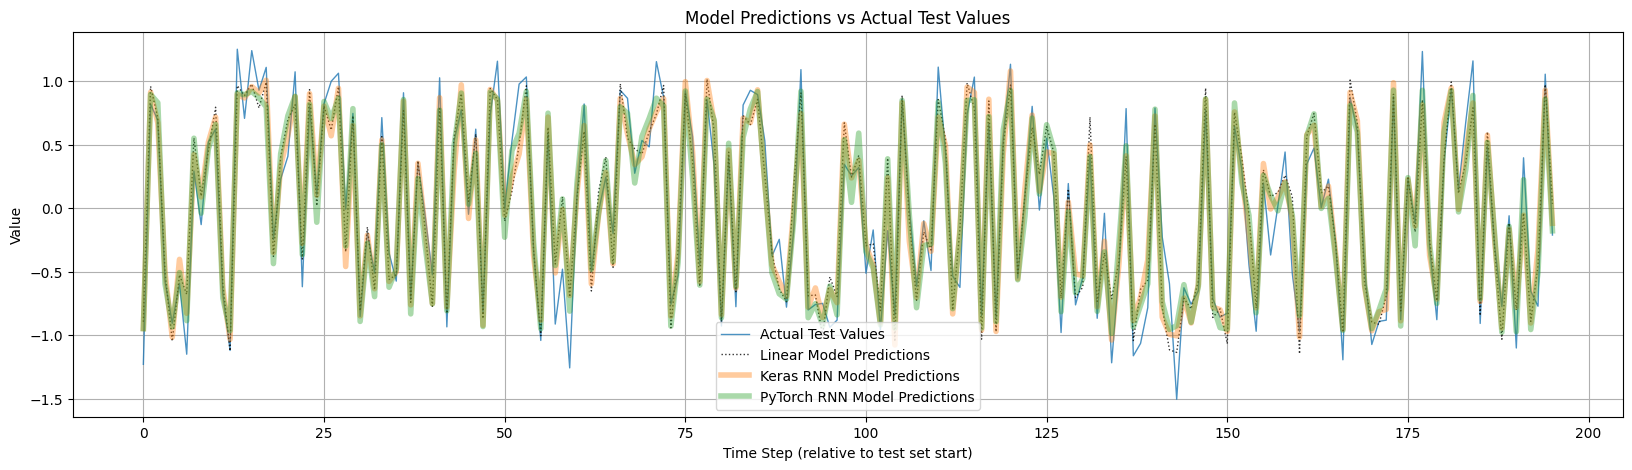

In [ ]:
import pandas as pd

# Evaluate the linear model
linear_eval = linear_model.evaluate(X_test, y_test, verbose=0)
print(f"Linear Model Test Loss (MSE): {linear_eval[0]:.4f}")
print(f"Linear Model Test MAE: {linear_eval[1]:.4f}")

# Evaluate the Keras RNN model
rnn_eval = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Keras RNN Model Test Loss (MSE): {rnn_eval[0]:.4f}")
print(f"Keras RNN Model Test MAE: {rnn_eval[1]:.4f}")

# Set the PyTorch RNN model to evaluation mode
pytorch_rnn_model.eval()

# Disable gradient calculations for PyTorch predictions
with torch.no_grad():
    # Make predictions on the X_test_tensor using the pytorch_rnn_model
    pytorch_predictions_tensor = pytorch_rnn_model(X_test_tensor)

# Move PyTorch predictions to CPU and convert to NumPy array
pytorch_predictions = pytorch_predictions_tensor.cpu().numpy()

# Calculate PyTorch RNN metrics
pytorch_loss = criterion(torch.tensor(pytorch_predictions).squeeze(), y_test_tensor).item()
mae = torch.mean(torch.abs(torch.tensor(pytorch_predictions).squeeze() - y_test_tensor)).item()

print(f"PyTorch RNN Model Test Loss (MSE): {pytorch_loss:.4f}")
print(f"PyTorch RNN Model Test MAE: {mae:.4f}")


# Create a dictionary to store the evaluation results
results = {
    'Model': ['Linear NN (Keras)', 'RNN (Keras)', 'RNN (PyTorch)'],
    'MSE': [linear_eval[0], rnn_eval[0], pytorch_loss],
    'MAE': [linear_eval[1], rnn_eval[1], mae]
}

# Create a pandas DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)
thick_line = 4

# Create a figure and axes for the plot
plt.figure(figsize=(20, 5))
ax = plt.gca() # Get current axes

# Plot the actual test values (y_test) on the axes
ax.plot(y_test, label='Actual Test Values', linewidth=thick_line/4, alpha=0.8)

# Plot the linear model's predictions (linear_predictions) on the axes
ax.plot(linear_predictions, label='Linear Model Predictions', color="black", linestyle=':', linewidth=thick_line/4, alpha=0.8)

# Plot the Keras RNN model's predictions (rnn_predictions) on the axes
ax.plot(rnn_predictions, label='Keras RNN Model Predictions', linewidth=thick_line, alpha=0.4)

# Plot the PyTorch RNN model's predictions on the axes
ax.plot(pytorch_predictions, label='PyTorch RNN Model Predictions', linewidth=thick_line, alpha=0.4)

# Add a title to the plot
ax.set_title('Model Predictions vs Actual Test Values')

# Add labels to the x-axis and y-axis
ax.set_xlabel('Time Step (relative to test set start)')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Add a grid to the plot
ax.grid(True)

# Display the plot
plt.show()

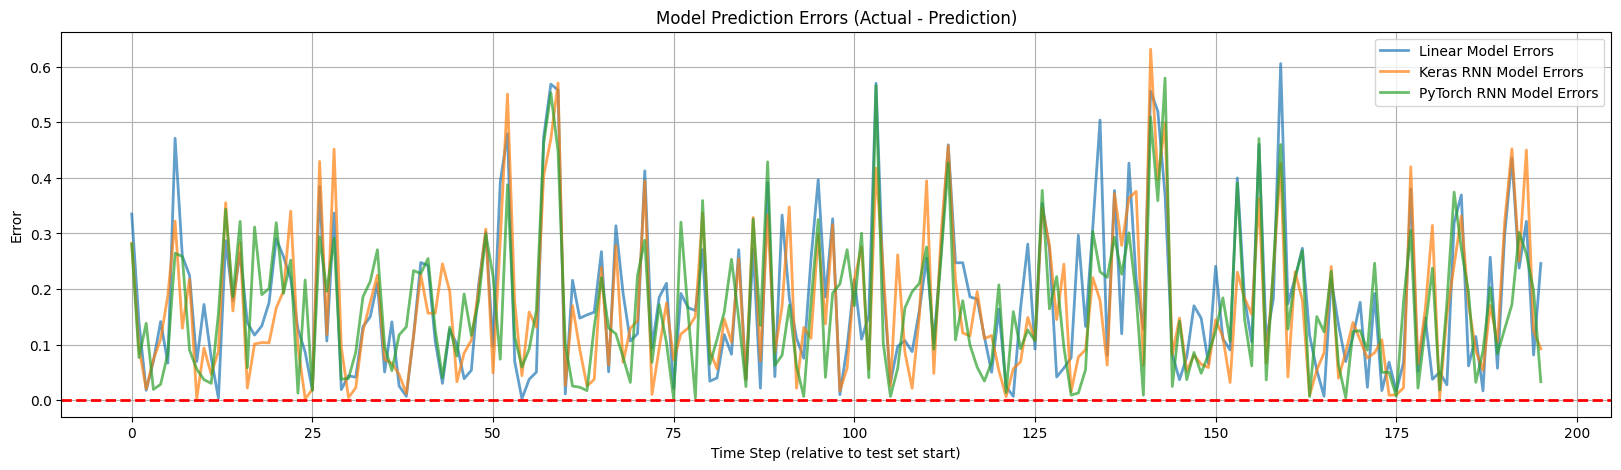

In [ ]:
# Calculate the differences (errors)
linear_errors = abs(y_test - linear_predictions.squeeze())
keras_rnn_errors = abs(y_test - rnn_predictions.squeeze())
pytorch_rnn_errors = abs(y_test - pytorch_predictions.squeeze())

# Create a figure and axes for the plot
plt.figure(figsize=(20, 5))
ax = plt.gca() # Get current axes

# Plot the differences for each model
ax.plot(linear_errors, label='Linear Model Errors', linewidth=2, alpha=0.7)
ax.plot(keras_rnn_errors, label='Keras RNN Model Errors', linewidth=2, alpha=0.7)
ax.plot(pytorch_rnn_errors, label='PyTorch RNN Model Errors', linewidth=2, alpha=0.7)

# Add a horizontal line at y=0 to indicate perfect prediction
ax.axhline(0, color='red', linestyle='--', linewidth=2)

# Add a title to the plot
ax.set_title('Model Prediction Errors (Actual - Prediction)')

# Add labels to the x-axis and y-axis
ax.set_xlabel('Time Step (relative to test set start)')
ax.set_ylabel('Error')

# Add a legend to the plot
ax.legend()

# Add a grid to the plot
ax.grid(True)

# Display the plot
plt.show()

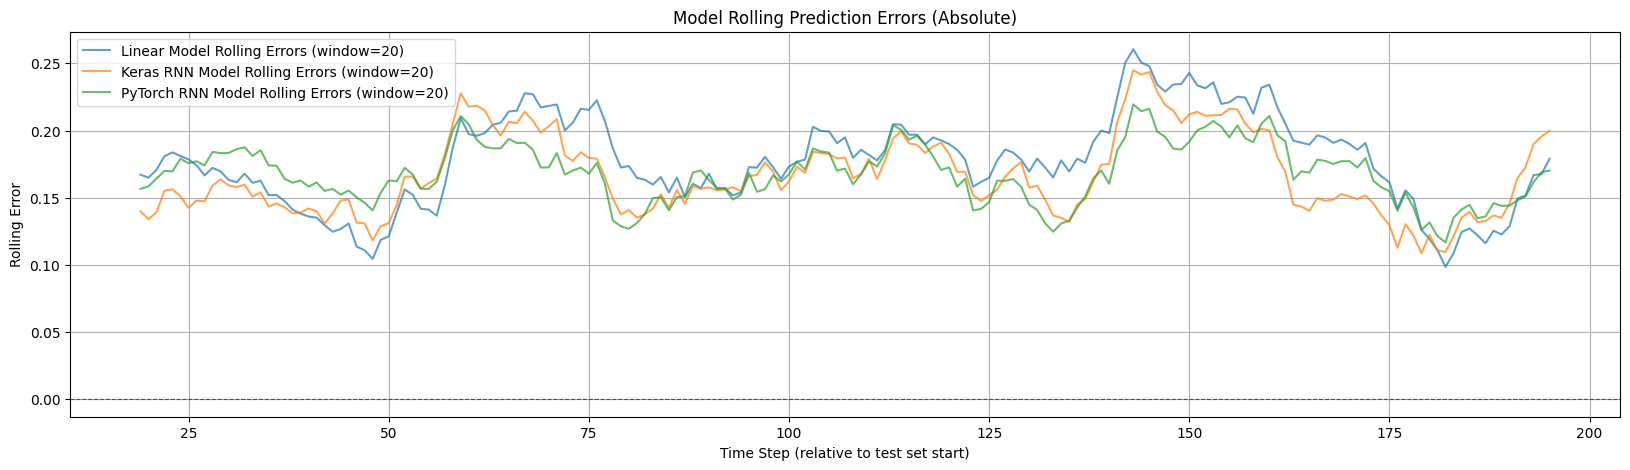

In [ ]:
# Calculate the absolute differences (errors)
linear_errors = abs(y_test - linear_predictions.squeeze())
keras_rnn_errors = abs(y_test - rnn_predictions.squeeze())
pytorch_rnn_errors = abs(y_test - pytorch_predictions.squeeze())

# Calculate rolling average of errors
window_size = 20  # You can adjust this window size
linear_rolling_errors = pd.Series(linear_errors).rolling(window=window_size).mean()
keras_rnn_rolling_errors = pd.Series(keras_rnn_errors).rolling(window=window_size).mean()
pytorch_rnn_rolling_errors = pd.Series(pytorch_rnn_errors).rolling(window=window_size).mean()

# Create a figure and axes for the plot
plt.figure(figsize=(20, 5))
ax = plt.gca() # Get current axes

# Plot the rolling average of errors for each model
ax.plot(linear_rolling_errors, label=f'Linear Model Rolling Errors (window={window_size})', alpha=0.7)
ax.plot(keras_rnn_rolling_errors, label=f'Keras RNN Model Rolling Errors (window={window_size})', alpha=0.7)
ax.plot(pytorch_rnn_rolling_errors, label=f'PyTorch RNN Model Rolling Errors (window={window_size})', alpha=0.7)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='red', linestyle='--', linewidth=0.8)

# Add a title to the plot
ax.set_title('Model Rolling Prediction Errors (Absolute)')

# Add labels to the x-axis and y-axis
ax.set_xlabel('Time Step (relative to test set start)')
ax.set_ylabel('Rolling Error')

# Add a legend to the plot
ax.legend()

# Add a grid to the plot
ax.grid(True)

# Display the plot
plt.show()